# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Los datos que me ayudaran a trabajar con el problema serian los precios de las propiedades, la cantidad de ambientes, cuartos y baños.**

**La localizacion seria el dato principal, el precio por metro cuadrado de la localizacion nos serviria para darnos un medida de comparacion rapida, donde si el valor esta por encima o bajo la media tendriamos que fijarnos en otros factores secundarios.** 

**Como datos secundarios, la valoracion de la propiedad se daria por cuestiones tales como: si la propiedad es luminosa, si da al frete o al pulmon de manzana (Departamentos); el estado de las mismas, si es a estrenar, en buenas condiciones o a refaccionar.** 

**Tambien existen otros datos que estan relacionados con la localizacion pero no por el barrio sino por la cercania a servicios basicos como el transporte publico, hospitales, supermercados, etc.**

**Por ultimo pero a mi entender importantes, son las opiniones y valoraciones de los tasadores o agentes inmobiliarios que visitan las propiedades.**

**Cabe tambien mensionar que el precio, indudablemente lo pone el mercado por lo que al final tambien esta atado al valor que  perciben los prospectos. Basandome en lo antes descripto algunos datos extras podrian ser: Tiempo de puesta en venta del inmueble y cantidad de prospectos al que se le ofrecieron y no compraron (Tasa de rebote).**

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



**Importamos las librerías necesarias para trabajar con el dataset.**

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Cargamos el dataset usando las funcionalidades de Pandas e imprimimos el Shape del dataset, el index y las columnas en el que observamos la cantidad de instancias y la cantidad y nombre de las columnas. A su vez visualizamos las cinco primeras instancias dandonos una idea de los tipos de datos.**

In [2]:

datasetO=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

print(datasetO.shape)
print(datasetO.index)
print(datasetO.columns)
datasetO.head()

(146660, 19)
RangeIndex(start=0, stop=146660, step=1)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


**Primero observamos cuantas instancias tiene cada columna en donde vemos que hay valores faltantes pero no cuantos. Tambien imprimimos la cantidad de valores faltantes por columna. Son 5 columnas las que tienen faltantes.**

In [3]:
print(datasetO.count())
print(datasetO.isna().sum())

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


**Observamos cuantos Tipos de propiedades existen en el dataset, son 10 tipos. Se puede ver la cantidad de propiedades por tipo.**

**Se grafico un Histograma para visualizar mejor la distribucion de las cantidades por tipo.**

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


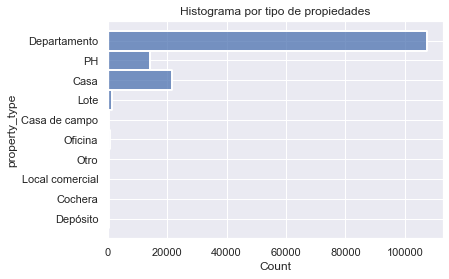

In [4]:
print(datasetO["property_type"].value_counts())
sns.set()
sns.histplot(y="property_type",data=datasetO);plt.title("Histograma por tipo de propiedades")
plt.show()

**Complementariamente se hizo un grafico de torta con el porcentaje de cada tipo de propiedad, intentando dar aun mas nociones de como es el dataset y la distruibucion de tipo de propiedad**

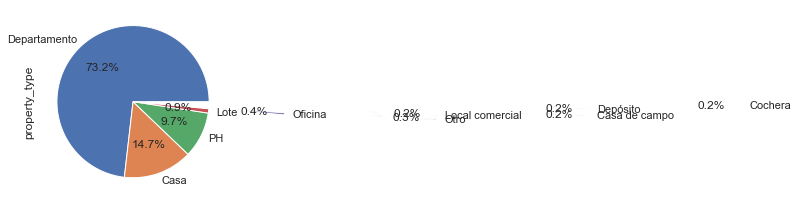

In [5]:
desface=(0,0,0,0,1,3,3,5,5,7)
datasetO["property_type"].value_counts().plot(kind="pie",autopct="%0.1f%%",explode=desface,figsize=(10,3.5))

plt.show()


**A traves de un grafico de barras podemos ver las 4 principales locaciones de las propiedades, donde la que posee la mayor cantidad de instancias es Capital Federal.**

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


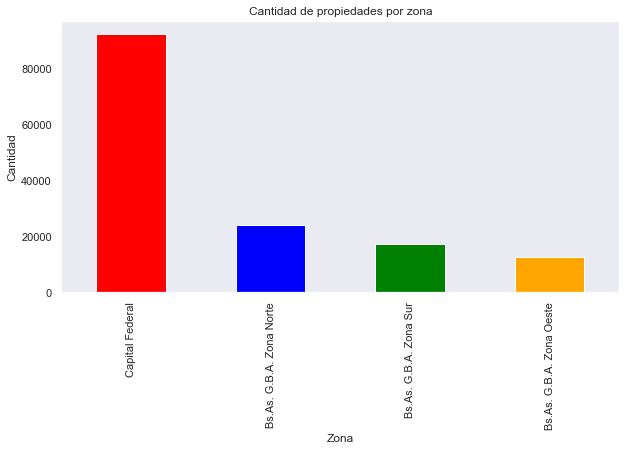

In [6]:
print(datasetO["l2"].value_counts())

my_colors = ['red' , "blue", "green",  "orange"]
datasetO["l2"].value_counts().plot(kind="bar",color=my_colors,figsize=(10,5));plt.title("Cantidad de propiedades por zona")
plt.ylabel("Cantidad")
plt.xlabel("Zona")
plt.grid()
plt.show()

**Aca hacemos un nuevo grafico de barras pero esta vez tomando la variable "l3" la cual esta dividida en las diferences localidades en las que hay una propiedad.**  

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


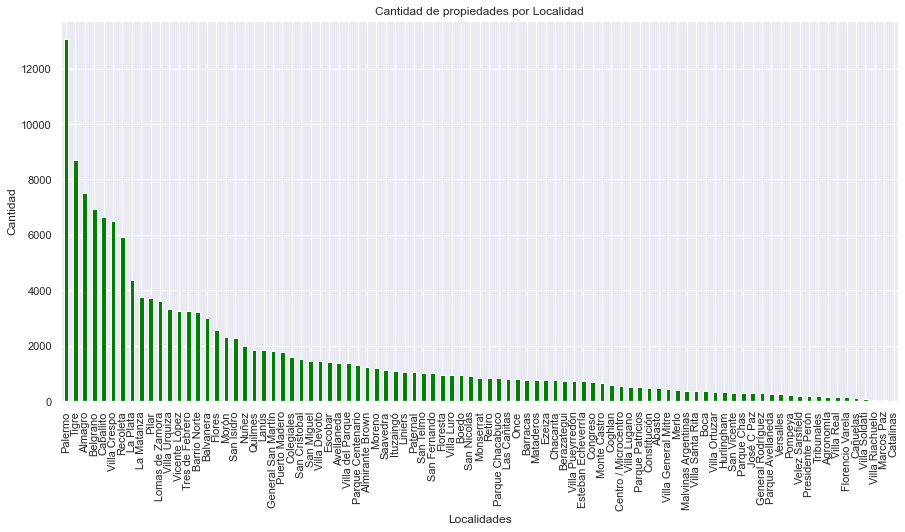

In [7]:
print(datasetO["l3"].value_counts())

datasetO["l3"].value_counts().plot(kind="bar",color="green",figsize=(15,7))
plt.title("Cantidad de propiedades por Localidad")
plt.ylabel("Cantidad")
plt.xlabel("Localidades")

plt.show()

**Para poder distinguir visualmente las cantidades de propiedades en cada localidad, en referencia a las cuatro grandes locaciones basadas en la variable "l2" les damos un color distintivo a cada una.**

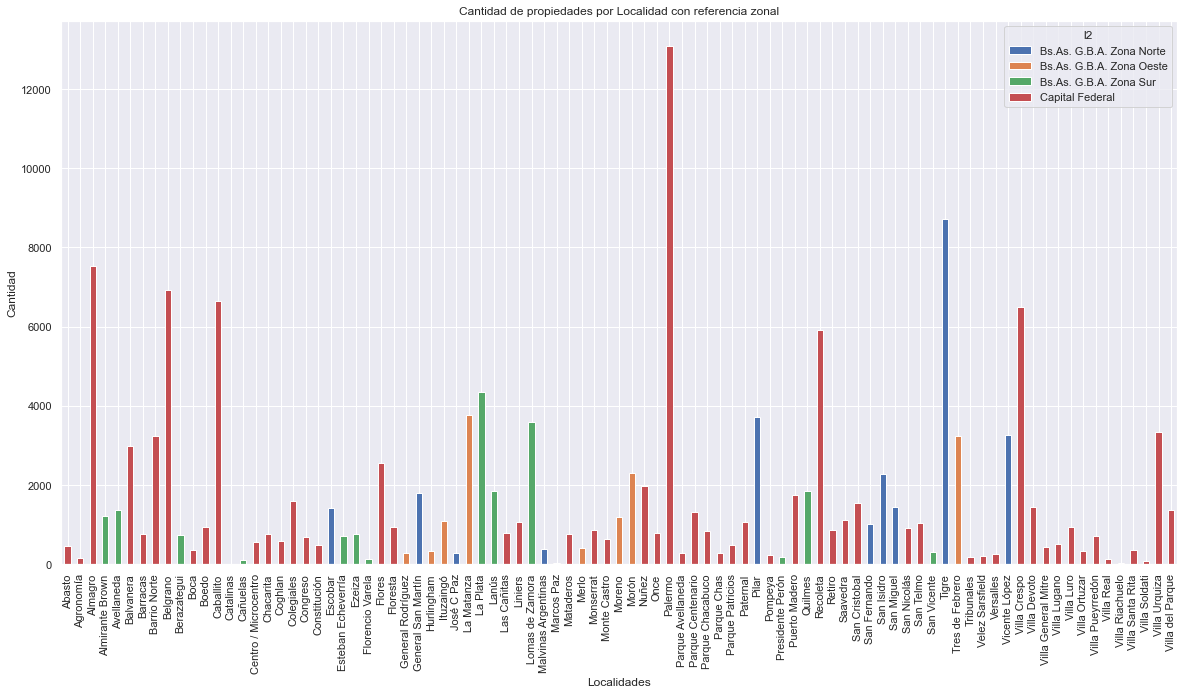

In [8]:
grouped_l2_l3=datasetO.groupby(["l2","l3"]).size()
grouped_l2_l3=grouped_l2_l3.reset_index()
grouped_l2_l3=grouped_l2_l3.rename(columns={0:"Cantidades"})
grouped_l2_l3=pd.pivot_table(grouped_l2_l3,columns="l2",index="l3",values="Cantidades")
grouped_l2_l3.plot(kind="bar", stacked=True,figsize=(20,10))
plt.title("Cantidad de propiedades por Localidad con referencia zonal")
plt.ylabel("Cantidad")
plt.xlabel("Localidades")
plt.show()

**Filtramos el Dataset por "Capital Federal" que es la locacion con mayor cantidad de propiedades y por tipo de propiedad que en este caso son los Departamentos, Phs y casas, llegando al numero de instancias y columnas indicadas en el Checkpoint.**

In [9]:
DataSet_filtrado1=datasetO[datasetO["l2"].str.contains("Capital Federal")]
DataSet_filtrado2=DataSet_filtrado1[(DataSet_filtrado1["property_type"].str.contains("Departamento")) | (DataSet_filtrado1["property_type"].str.contains("PH")) | (DataSet_filtrado1["property_type"].str.contains("Casa"))]
DataSet_filtradoSF=DataSet_filtrado2.drop(DataSet_filtrado2[DataSet_filtrado2["property_type"]=="Casa de campo"].index)

print(DataSet_filtradoSF.shape)

(91485, 19)


surface_total**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

**Filtramos las instancias donde la superficie cubierta es mayor a la superficie total**

In [10]:
DataSet_filtradoF=DataSet_filtradoSF[(DataSet_filtradoSF["surface_covered"])<=(DataSet_filtradoSF["surface_total"])]
print(DataSet_filtradoF.shape)

(81291, 19)


**Visualizaremos los estadisticos y tambien nos respaladaremos con histogramas y Boxplots para analizar si existen outliers a eliminar**

**Vemos en los estadisticos que ya hay grandes diferencias al observar los maximos, minimos y std, por lo que vamos a realizar nuevos filtros para optimizar la informacion y poder definir mas adelante que variables seleccionaremos para nuestro modelo.
Observaremos los Boxplots ya que nos indican los limites**

In [11]:
DataSet_filtradoF.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,77040.000000,77040.000000,81291.000000,81291.000000,80458.000000,81291.000000,81291.000000,8.129100e+04
mean,-34.598354,-58.434841,3.004957,1.998745,1.554600,112.920348,92.261271,2.657606e+05
std,0.023408,0.035766,1.299796,1.045831,0.853083,988.263003,769.777375,3.337463e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,-34.612168,-58.457280,2.000000,1.000000,1.000000,49.500000,44.000000,1.250000e+05
50%,-34.598669,-58.432771,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,-34.584161,-58.409599,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,-34.535909,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [12]:
%matplotlib inline

**Vemos en las variables rooms el grafico de la distribucion es interpretable mostrando que la mayoria de las propiedades poseen entre 1 y 2 ambientes, lo mismo pasa con bedrooms y bathrooms donde la mayoria de las propiedades poseen entre 1 y 2 cuartos y baños cada una.**
**Se observa que en las variables "surface_covered"/"surface_total"/"price" no so comprensibles en estos histogramas, al se valores continuos y al tener una rango de precios tan aplio.Creemos que los outliers distorsionan los graficos de tal manera que imposibilitan la comprension por lo que vamos a trabajar en el filtrado de los mismos luego de de una visualizacion en boxplot de estas variales.**

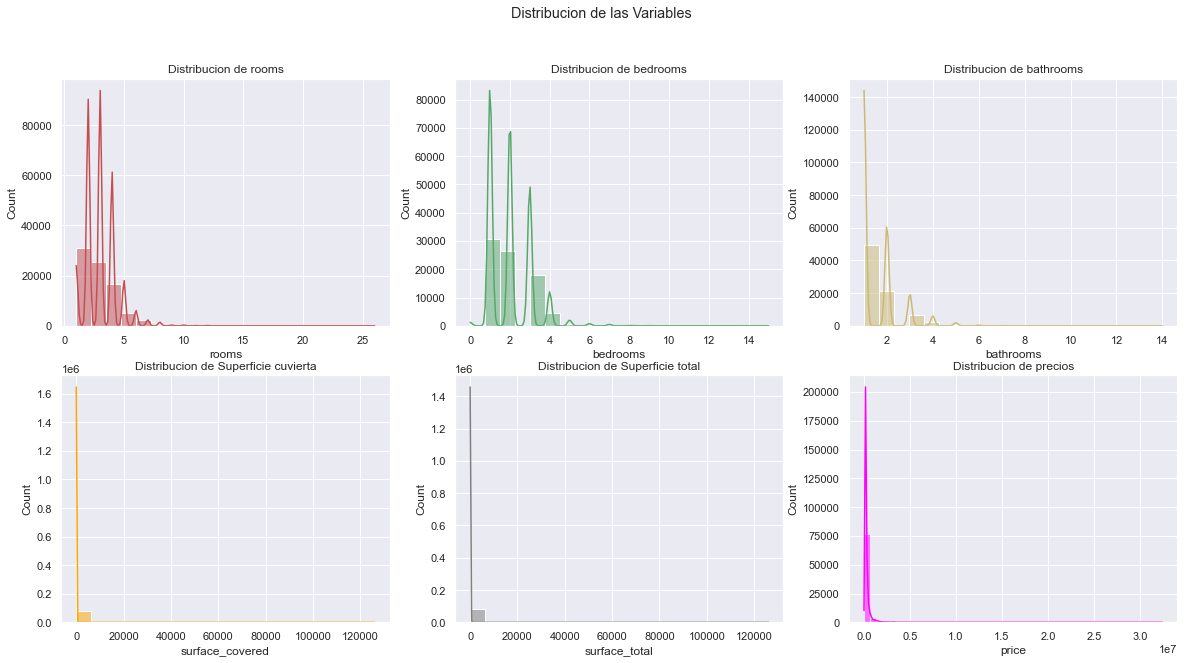

In [13]:
sns.set()
plt.figure(figsize=(20,10))
plt.suptitle("Distribucion de las Variables")
plt.subplot(2,3,1)
sns.histplot(x=DataSet_filtradoF["rooms"],bins=20,color="r",kde=True);plt.title("Distribucion de rooms")
plt.subplot(2,3,2)
sns.histplot(x=DataSet_filtradoF["bedrooms"],bins=20,color="g",kde=True);plt.title("Distribucion de bedrooms")
plt.subplot(2,3,3)
sns.histplot(x=DataSet_filtradoF["bathrooms"],bins=20,color="y",kde=True);plt.title("Distribucion de bathrooms")
plt.subplot(2,3,4)
sns.histplot(x=DataSet_filtradoF["surface_covered"],bins=20,color="orange",kde=True);plt.title("Distribucion de Superficie cuvierta")
plt.subplot(2,3,5)
sns.histplot(x=DataSet_filtradoF["surface_total"],bins=20,color="grey",kde=True);plt.title("Distribucion de Superficie total")
plt.subplot(2,3,6)
sns.histplot(x=DataSet_filtradoF["price"],bins=50,color="magenta",kde=True);plt.title("Distribucion de precios")
plt.show()

**Graficando los boxplot observamos que en las variables room, bedrooms y bathroom se ven claramente los cuartiles y los bigotes inferior y superior por lo que los corroboramos una buena distribucion de las mismas, se ven tambien cierta cantidad de outliers pero que no vemos la necesidad de trabajarlos en este momento sobre todo para no reducir tanto el dataset.
**Por otro lado vemos que en las variables surface total, surface covered y price la grafica es incomprensible, no se observan los cuartiles ni los bigotes solo un conjunto de outliers en cantidad y en valores muy elevados, esto nos indica que en estas tres variables tenemos que trabajar los mismos.**

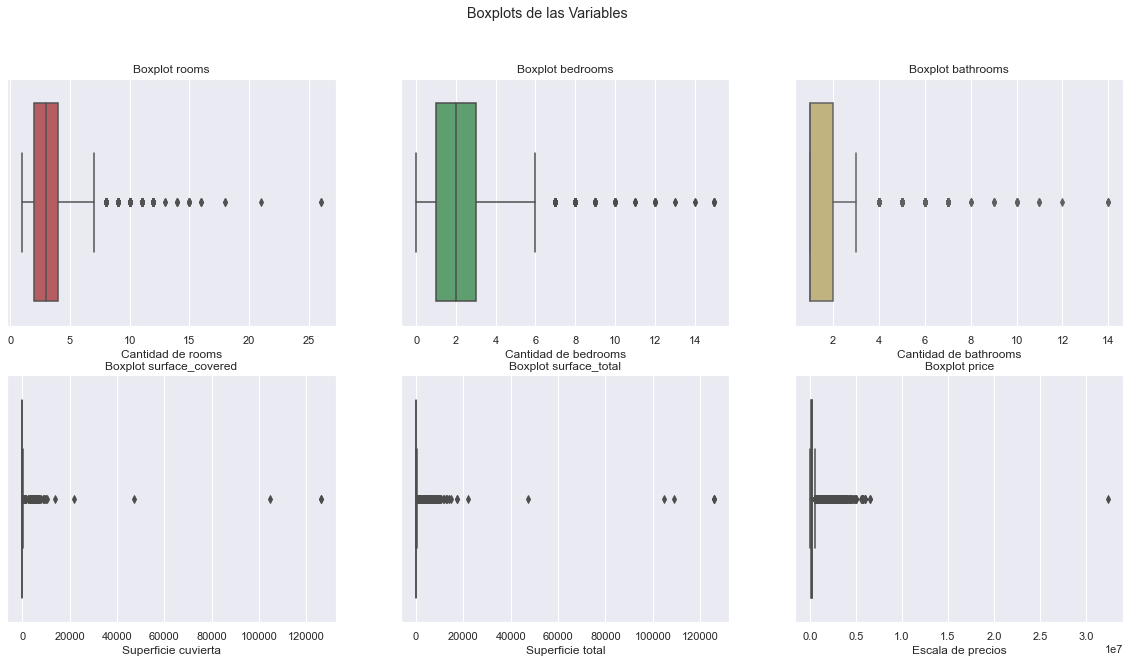

In [14]:
sns.set()
plt.figure(figsize=(20,10))
plt.suptitle("Boxplots de las Variables")
plt.subplot(2,3,1)
sns.boxplot(x=DataSet_filtradoF["rooms"],color="r");plt.title("Boxplot rooms");plt.xlabel("Cantidad de rooms")
plt.subplot(2,3,2)
sns.boxplot(x=DataSet_filtradoF["bedrooms"],color="g");plt.title("Boxplot bedrooms");plt.xlabel("Cantidad de bedrooms")
plt.subplot(2,3,3)
sns.boxplot(x=DataSet_filtradoF["bathrooms"],color="y");plt.title("Boxplot bathrooms");plt.xlabel("Cantidad de bathrooms")
plt.subplot(2,3,4)
sns.boxplot(x=DataSet_filtradoF["surface_covered"],color="orange");plt.title("Boxplot surface_covered");plt.xlabel("Superficie cuvierta")
plt.subplot(2,3,5)
sns.boxplot(x=DataSet_filtradoF["surface_total"],color="grey");plt.title("Boxplot surface_total");plt.xlabel("Superficie total")
plt.subplot(2,3,6)
sns.boxplot(x=DataSet_filtradoF["price"],color="magenta");plt.title("Boxplot price");plt.xlabel("Escala de precios")
plt.show()

**Empezamos con "surface_total" donde calculamos el rango inter cuartil y los bigotes superior e inferior para poder filtrar los outliers.**

**Observamos que el bigote superior es de 203 metros por lo que filtramos por este valor.**

**A su vez vemos que el bigote inferior es negativo y comparando con el minimo observado en los estadisticos ("DataSet_filtradoF.describe()") que es 12, tendriamos que filtrar por 12, pero.....** 

In [15]:
Q1_surface_T=DataSet_filtradoF["surface_total"].quantile(0.25)
Q3_surface_T=DataSet_filtradoF["surface_total"].quantile(0.75)
IQR=Q3_surface_T-Q1_surface_T
BI_surface_T=(Q1_surface_T-1.5*IQR)
BS_surface_T=(Q3_surface_T+1.5*IQR)
print("BI_surface_T:",BI_surface_T)
print("BS_surface_T:",BS_surface_T)

BI_surface_T: -42.75
BS_surface_T: 203.25


**Solo filtramos por propiedades menores a 203 metros.**

**No vamos a filtrar por el minimo de 12 metros, si bien esta dimension me llamo la atencion corroboramos la existencia de departamentos en la Ciudad de Buenos Aires de esas dimensiones.**

**https://www.baenegocios.com/negocios/Se-vende-el-departamento-mas-chico-de-la-Ciudad-de-Buenos-Aires-20210503-0067.html**

In [16]:
DataSet_filtradoF=DataSet_filtradoF[(DataSet_filtradoF["surface_total"]<=203)] 


**Observando los estadisticos aparece en la variable Superficie cubierta un minimo de 1 metro cuadrado y en Superficie total el minimo es de 12 metros por lo que vamos a filtrar los minimos de Superficie cubierta en 12 metros para darle logica al dataset.**

**Vemos que el bigote inferior es negativo por lo que corroboro mi hipotesis anterior al tomar 12 metros, como tambien veo que el bigote superior es menor que el de Superficie total, por el momento no veo oportuno filtrar esto.**

In [17]:
Q1_surface_c=DataSet_filtradoF["surface_covered"].quantile(0.25)
Q3_surface_c=DataSet_filtradoF["surface_covered"].quantile(0.75)
IQR_S_C=Q3_surface_c-Q1_surface_c
BI_surface_c=(Q1_surface_c-1.5*IQR_S_C)
BS_surface_c=(Q3_surface_c+1.5*IQR_S_C)
print("BI_surface_C:",BI_surface_c)
print("BS_surface_C:",BS_surface_c)

BI_surface_C: -20.0
BS_surface_C: 148.0


In [18]:
DataSet_filtradoF=DataSet_filtradoF[(DataSet_filtradoF["surface_covered"]>=12)] 

**Antes de analizar los precios vamos a corroborar nuevamente con Histogramas, boxplots y estadisticos si con el filtro de instancias que recien hicimos al eliminar los "outliers" de Superficie total y Superficie cubierta, impactaron en la variable precio y si son suficientes o hay que hacerle el mismo tratamiento.**


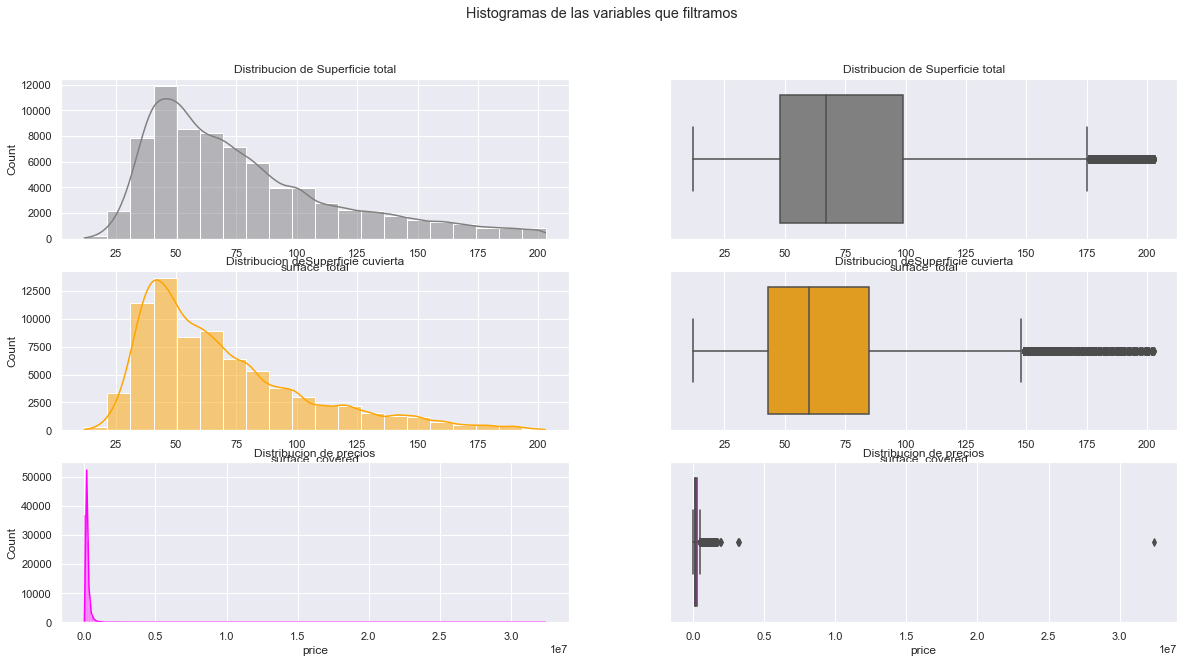

In [19]:
sns.set()
plt.figure(figsize=(20,10))

plt.suptitle("Histogramas de las variables que filtramos")
plt.subplot(3,2,1)
sns.histplot(x=DataSet_filtradoF["surface_total"],bins=20,color="grey",kde=True);plt.title("Distribucion de Superficie total")
plt.subplot(3,2,2)
sns.boxplot(x=DataSet_filtradoF["surface_total"],color="grey");plt.title("Distribucion de Superficie total")
plt.subplot(3,2,3)
sns.histplot(x=DataSet_filtradoF["surface_covered"],bins=20,color="orange",kde=True);plt.title("Distribucion deSuperficie cuvierta")
plt.subplot(3,2,4)
sns.boxplot(x=DataSet_filtradoF["surface_covered"],color="orange");plt.title("Distribucion deSuperficie cuvierta")
plt.subplot(3,2,5)
sns.histplot(x=DataSet_filtradoF["price"],bins=200,color="magenta",kde=True);plt.title("Distribucion de precios")
plt.subplot(3,2,6)
sns.boxplot(x=DataSet_filtradoF["price"],color="magenta");plt.title("Distribucion de precios")
plt.show()

**Observamos que en las variables Surface Total y Surface covered el trabajo que realizamos sobre los outliers fueron adecuados podemos distinguir los cuartiles y la mediana en los boxplots como tambien los bigotes Inferiores y superiores, si bien vemos  que aun quedan algunos, no consideramos que tengamos que seguir filtrando para no seguir perdiendo instancias.
**Se puede observar que en los histogramas ya la distribucion es mas consistente y la mayor cantidad de propiedades poseen arrededor de 50 metros. Si bien no es una campana simetrica, que indudablemente esta bien que no lo sea, corroboramos entre los dos estilos de graficos que ya en estas dos variables estan bien.**
**Por el contrario, vemos que el precio tiene aun outliers pronunciados, a simple vista uno de mayor precio el cual consideramos es el causante de la distorcion.**

**Al trabajar en la variable precio;calculando el minimo precio vemos que no es logico por lo que trabajaremos con el bigote superior y esta vez como en las anteriores determinaremos el minimo de otra manera ya que el resultado del Bigote inferior es negativo** 

In [20]:
min_price=DataSet_filtradoF["price"].min()
max_price=DataSet_filtradoF["price"].max()
std_price=DataSet_filtradoF["price"].std()
mean_price=DataSet_filtradoF["price"].mean()

Q1_price=DataSet_filtradoF["price"].quantile(0.25)
Q3_price=DataSet_filtradoF["price"].quantile(0.75)
IQR_P=Q3_price-Q1_price

BI_price=(Q1_price-1.5*IQR_P)
BS_price=(Q3_price+1.5*IQR_P)

print("Precio minimo:",min_price)
print("Precio maximo:",max_price)
print("Precio promedio:",mean_price)
print("Desviacion standar:",std_price)
print("BI_price:",BI_price)
print("BS_price:",BS_price)


Precio minimo: 6000.0
Precio maximo: 32434232.0
Precio promedio: 214668.3675682878
Desviacion standar: 194316.06451017637
BI_price: -82500.0
BS_price: 457500.0


**Realice una consulta filtrando por =>    "DataSet_filtradoF[(DataSet_filtradoF["price"]>6000) & (DataSet_filtradoF["price"]<14000)].**
**Ya que eran pocas instacias se podia ver que eran "cocheras", "Departamentos en contruccion" y " Oportunidades de inversion"; estas ultimas pueden ser construcciones o reales oportunidades pero a fines de este analisis quedarian afuera.**

**Para filtrar los precios muy superiores tome el valor promedio mas 1,5 la desviacion standar**


In [21]:
DataSet_filtradoF=DataSet_filtradoF[(DataSet_filtradoF["price"]>14000) & (DataSet_filtradoF["price"]<506000) ]


**Aqui podemos observar que la variable precio al quitarle los outliers ya es representada de manera legible e interpretable.En los graficos podemos ver claramente la mediana de 165.000 y los diferentes cuartiles y bigites. La Distibricion de la mismas es adecuada, viendo la mayor consentracion en una rango alrededor de la media de los 189.000.**
**Podemos observar que con los filtros aplicados ya optimizaron las variables que lo requerian por lo que el dataset estaria suficientemente procesado para ver la correlaciones de las variables.** 

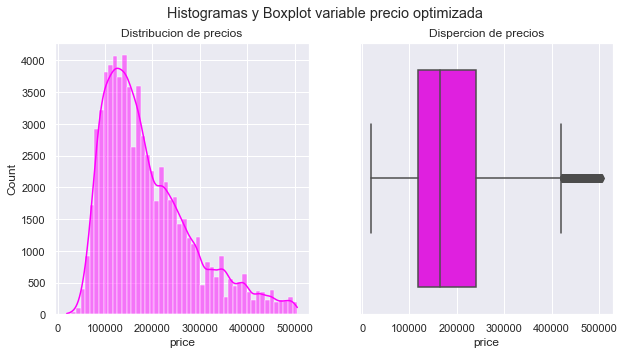

count     71579.000000
mean     189295.268207
std       94381.007682
min       18900.000000
25%      119000.000000
50%      165000.000000
75%      240000.000000
max      505879.000000
Name: price, dtype: float64

In [22]:
sns.set()
plt.figure(figsize=(10,5))
plt.suptitle("Histogramas y Boxplot variable precio optimizada")
plt.subplot(1,2,1)
sns.histplot(x=DataSet_filtradoF["price"],bins=50,color="magenta",kde=True);plt.title("Distribucion de precios")
plt.subplot(1,2,2)
sns.boxplot(x=DataSet_filtradoF["price"],color="magenta");plt.title("Dispercion de precios")
plt.show()
DataSet_filtradoF["price"].describe()

**Haremos un Pairplot y determinar si son razonable las relaciones de las distintas variables con respecto al precio, que es la variable a predecir.**
**Se puede observar en los graficos de "Rooms/price", "bedrooms/price", bathrooms/price" que por mismas cantidad de rooms/bedrooms/bathrooms el rango de precio varia muchisimos de min a max precios. los mismo vemos en surface total y surface covered. Esto nos hace pensar que existe otra variable muy importante para demostrar este comportamiento que a nuestro entender es la ubicacion.**


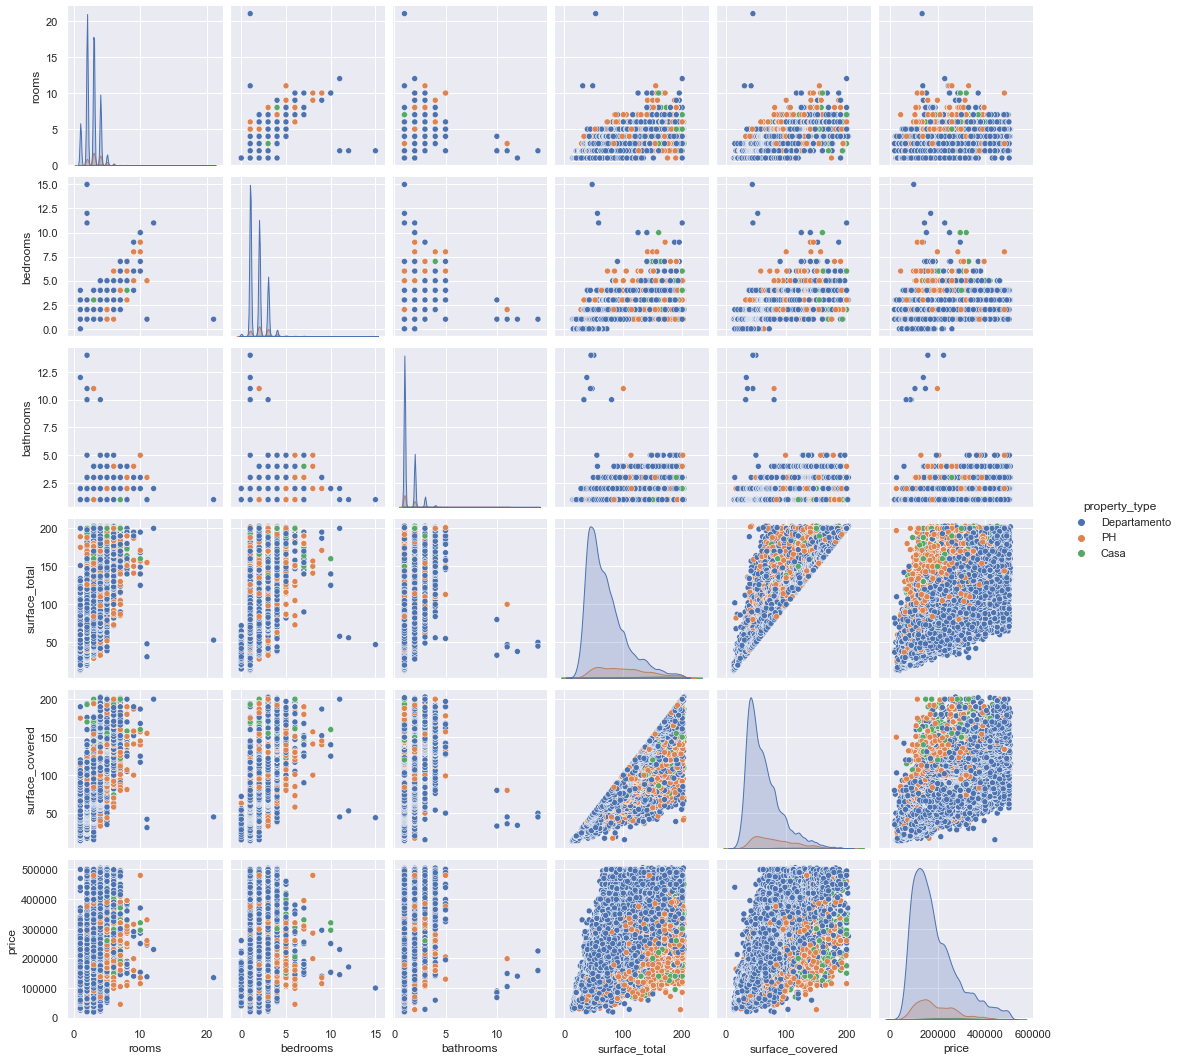

In [23]:
sns.set()
sns.pairplot(data=DataSet_filtradoF.drop(columns=["lat","lon"]),hue="property_type")
plt.show()

**Realizamos un mapa de calor sobre las correlaciones donde determinaremos cuales son las variables mas correlacionadas con la variable precios; sabiendo que los valores de correlacion van de -1 a 1 donde 0 significa que no estan relacionada y mientras mas se acercan a 1 o -1 mas relacionadas estan.**

**Podemos concluir a partir del mapa de calor que las variables mas correlacionadas con el precio son "Surface total:0.73", "Surface cuvered:0.75", "rooms:0.58", "bedrooms:0.56" y "bathrooms:0.61" de este analisis es de donde nos basaremos para determinar que variables utilizaremos en nuestros modelos.** 

**A pesar de lo dicho en la breve interpretacion del pairplot donde veiamos que la relacion del precio con variables tales como rooms bedrooms,etc, no tenian una relacion total ya que veiamos que faltaba la ubicacion y esa iba a ser la variable mas importante, aqui en el mapa de calor no dice que son las mas relacionadas.**
**Lat y log si bien son medidas de ubicacion la correlacion que poseen con respecto al precio no es alta ya que se calculan por separado y las ubicaciones se componen con lat y log de a pares y no de manera individual.**

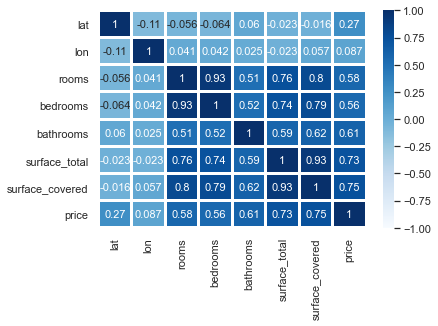

In [24]:
sns.set()
sns.heatmap(DataSet_filtradoF.corr(), cmap="Blues", vmin=-1, vmax=1, annot=True,linewidth=2, annot_kws={"fontsize": 11}) 
plt.show()                                                                                                                                                                                                                                                                                                                   

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### Nos preguntamos:
**¿Cuál es el barrio más caro de Capital Federal?¿La ubicacion realmente es un factor importante para predecir el valor de un inmueble?**

**¿ Ante los distintos tamaños de los inmuebles del dataset que contamos, podremos tener una referencia real de los valores de los inmuebles por localidad?**

Tomamos el dataset ya filtrado 

In [25]:
dataset_D=DataSet_filtradoF

Definimos una funcion para hacer un calculo entre columnas.Y saber el precio del metro cuadrado de cada departamento ya que el dataset con el que contamos no tiene este dato, por lo que lo agregaremos. 

In [26]:
def metrocuadrado(fila):
    resultado=fila["price"]/fila['surface_total']
    return resultado

Agregamos una columna con el calculo.

In [27]:
dataset_D["m2"]=dataset_D.apply(metrocuadrado,axis=1)

Sacamos el promedio de las variables agrupando por Localidad.
Graficamos en barras precios promedio de los inmuebles por localidad.

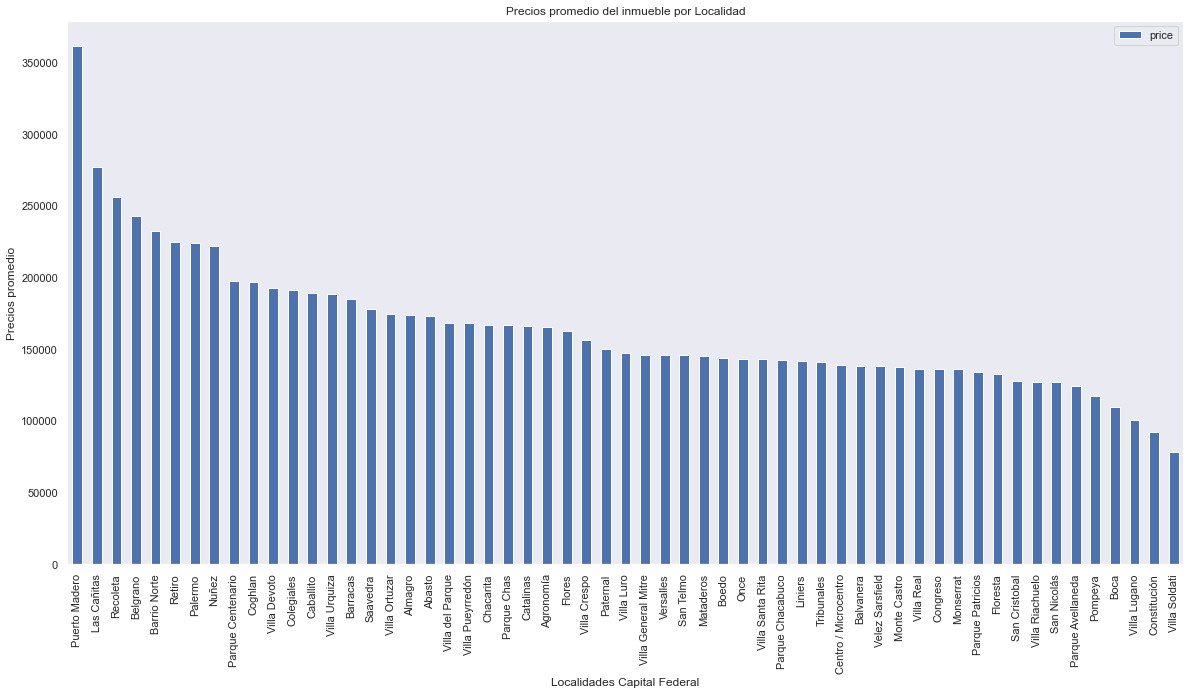

In [28]:
grouped_desafio=dataset_D.groupby("l3",).mean()
grouped_desafio1=grouped_desafio.reset_index()
grouped_desafio1.head()
grouped_desafio1=grouped_desafio1.sort_values(by=["price"],ascending=[False])
grouped_desafio1.plot(x="l3",y="price",kind="bar",stacked=True,figsize=(20,10))
plt.title("Precios promedio del inmueble por Localidad")
plt.xlabel("Localidades Capital Federal")
plt.ylabel("Precios promedio")
plt.grid()
plt.show()

Vemos claramente como cambia el precio dependiendo la localidad, vemos que la ubicacion mas cara es "Puerto Madero".
Ya con este simple grafico nos damos cuenta que la ubicacion es muy importante a la hora de predecir precios.
Pero aqui no podemos vizualizar si el precio esta sesgado por la variacion de los tamaños del inmueble por zona.
Por lo que vizualizaremos que zona tiene el mayor precio por metro cuadrado.

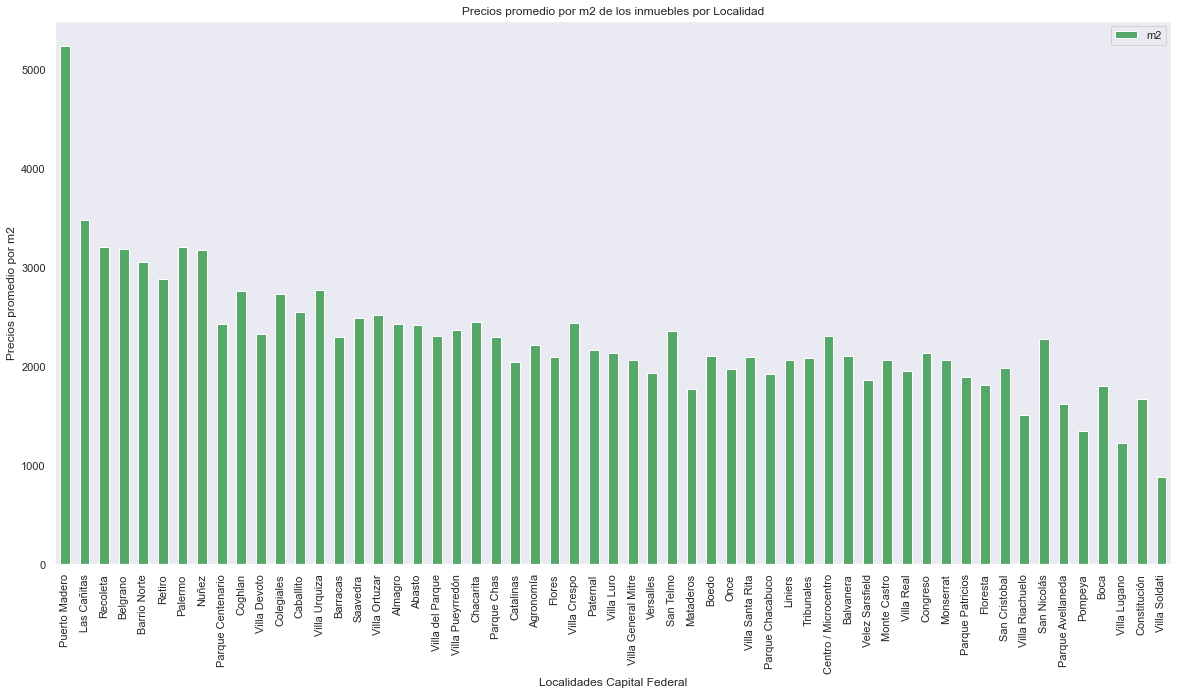

In [29]:
grouped_desafio1.plot(x="l3",y="m2",kind="bar",stacked=True,figsize=(20,10),color="g")
plt.title("Precios promedio por m2 de los inmuebles por Localidad")
plt.xlabel("Localidades Capital Federal")
plt.ylabel("Precios promedio por m2")
plt.grid()
plt.show()

Teniendo el valor del metro cuadrado por ubicacion ya logramos sacar el sesgo que nos daba el tamaño de los inmuebles.
Por ejemplo podemos ver que caso de Palermo el valor del metro cuadrado supera al de Belgrano y el la grafica anterior se veia que el precio promedio de los inmueble en belgrano era mayor que en Palermo.
Con estos dos graficos pudimos contestar nuestras preguntas y sobre todo podemos asegurar que la zona es un factor determinante a la hora de predecir el precio.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**Hacemos los filtros correspondientes para alcanzar el checkpoint indicado.(Dataset con 81019 instacias y 6 columnas.)**

In [30]:
datasetOrig=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
DataSet_filtradoA=datasetOrig[datasetOrig["l2"].str.contains("Capital Federal")]
DataSet_filtradoB=DataSet_filtradoA[(DataSet_filtradoA["property_type"].str.contains("Departamento")) | (DataSet_filtradoA["property_type"].str.contains("PH")) | (DataSet_filtradoA["property_type"].str.contains("Casa"))]
DataSet_filtradoC=DataSet_filtradoB.drop(DataSet_filtradoB[DataSet_filtradoB["property_type"]=="Casa de campo"].index)
DataSet_filtradoE=DataSet_filtradoC.drop(columns=['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
                                                   'currency', 'title', 'description', 'property_type','operation_type'])
DataSet_filtradoD=DataSet_filtradoE[(DataSet_filtradoE["surface_total"]<=1000) &(DataSet_filtradoE["surface_total"]>=15) &(DataSet_filtradoE["price"]<=4000000)] 
dataset_F_F=DataSet_filtradoD.dropna()
print(dataset_F_F.shape)

(81019, 6)


**Se importan los modulos de la libreria Sklearn que vamos a utilizar**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Metrica elegida:**

**RMSE:Esta metrica mide la magnitud media del error. Es la raiz cuadrada del promedio cuadrados entres la predicion y la observacion real.Los valores pueden osilar entre 0 a infinito y es indiferente a la direccion de los errores**

**La eleccion de la metrica RMSE fue por diferentes cuestiones, tales como que es una metrica para modelos de regresion, no podria haber elegido accurancy ni la matriz de confusion ya que son para modelos de clasificacion.Ya siendo mas especifico la eleccion se baso en que tiene la misma unidad que los valores objetivo, es claro e interpretable.Los valores mas bajos son mejores y los mas altos peores por ejemplo para un modelo perfecto el RSME seria 0.**

**Otra ventaja que ayudo a la eleccion es que el RMSE otorga un peso relativamente alto a los errores grandes, por lo que RMSE debería ser útil cuando los errores grandes no son deseables, por lo que el modelo ahora puede enfocarse mas en los errores grandes.**

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
from sklearn.tree  import DecisionTreeRegressor
from sklearn.neighbors  import KNeighborsRegressor

**Se eligen 'rooms','surface_total', 'surface_covered','bathrooms', por su correlacion al precio como variables predictoras. Elegi 'bathrooms' y no 'Bedrooms' a pesar de que 'bedrooms' tenia mayor correlacion ya que considero que en rooms esto se incluiria**

**La variable a predecir es "price".**

In [34]:
X=dataset_F_F[['rooms','surface_total', 'surface_covered','bathrooms']]
y=dataset_F_F["price"]

**Se realiza el split de un test size de 20% y un train size de 80%.**

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

**Se elige el modelo de LinearRegression como modelo Benckmark.**

**Como metrica se eligio el RMSE.**

In [36]:
Model_Benckmark=LinearRegression()
Model_Benckmark.fit(X_train,y_train)

predicion_ytest=Model_Benckmark.predict(X_test)
predicion_ytrain=Model_Benckmark.predict(X_train)

print("RMSE_Test:",mean_squared_error(y_test,predicion_ytest,squared=False))
print("RMSE_Train:",mean_squared_error(y_train,predicion_ytrain,squared=False))
print("--------------------------------------------------------")
print("r2_score_Test:",r2_score(y_test,predicion_ytest))
print("r2_score_Train:",r2_score(y_train,predicion_ytrain))

RMSE_Test: 205134.16834747652
RMSE_Train: 200925.27409643933
--------------------------------------------------------
r2_score_Test: 0.5385701942444412
r2_score_Train: 0.5459531832912174


**RMSE que mide la magnitud media del error vemos que es muy alto, esto se puede deber al modelo seleccionado y al procesamiento de los datos ya que en esto falta mucho que aprender y hacer.**

**El R2 nos da en Test que el 53,8% osea que el modelo explica la variacion de precio en esta medida. No es optima pero veremos como la mejoramos con los siguinetes modelos.**

**Si embargo lo utilizaremos para comparar.**

**Graficamos.**

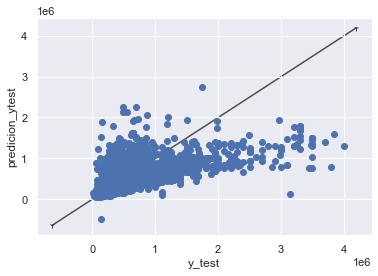

In [37]:
ax1=plt.subplot(1,1,1)
ax1.scatter(y_test,predicion_ytest)
lims= [np.min([ax1.get_xlim(),ax1.get_ylim()]),np.max([ax1.get_xlim(),ax1.get_ylim()]),]

ax1.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.xlabel("y_test")
plt.ylabel("predicion_ytest")
plt.show()

# Modelo KNeighborsRegressor

**Compararemos este modelo en base al hiperparametro "distance"  y "uniform" a la vez que determinaremos que cantidad de vecinos es la que mejor resultado nos arroja.**

Teniendo en cuenta que:

* uniform donde todos los puntos valen lo mismo.

* distance donde los votos de los puntos mas cercanos tienen mas valor.

**Armamos una iteracion para determinar cual es la cantidad de vecinos mas conveniente. Tomando la metrica RMSE**

In [38]:
knn_D_lista_test= []
knn_D_lista_train= []
knn_U_lista_train= []
knn_U_lista_test= []

knn_DU_Nneighbors=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_neighbors in knn_DU_Nneighbors:
    
    knn_D=KNeighborsRegressor(n_neighbors= n_neighbors, weights="distance")
    knn_D.fit(X_train,y_train)
             
    D_ytrain_predic=knn_D.predict(X_train)
    DTrainRMSE=mean_squared_error(y_train,D_ytrain_predic,squared=False)
    
    D_ytest_predic= knn_D.predict(X_test)
    DTestRMSE=mean_squared_error(y_test,D_ytest_predic,squared=False)
         
    knn_U=KNeighborsRegressor(n_neighbors= n_neighbors, weights="uniform")
    knn_U.fit(X_train,y_train)
            
    U_ytrain_predic=knn_U.predict(X_train)
    UTrainRMSE=mean_squared_error(y_train,U_ytrain_predic,squared=False)
    
    U_ytest_predic= knn_U.predict(X_test)
    UTestRMSE=mean_squared_error(y_test,U_ytest_predic,squared=False)
        
    knn_D_lista_train.append(DTrainRMSE)
    knn_D_lista_test.append(DTestRMSE)    
    knn_U_lista_train.append(UTrainRMSE)
    knn_U_lista_test.append(UTestRMSE)

**Graficamos para determinar cual es el mejor numero de vecinos a elegir en cada uno de los modelos, diferenciados por el hiperparametro "distance" y "uniform", para luego comparar las metricas RMSE y R2 concluyendo cual es el mejor.**

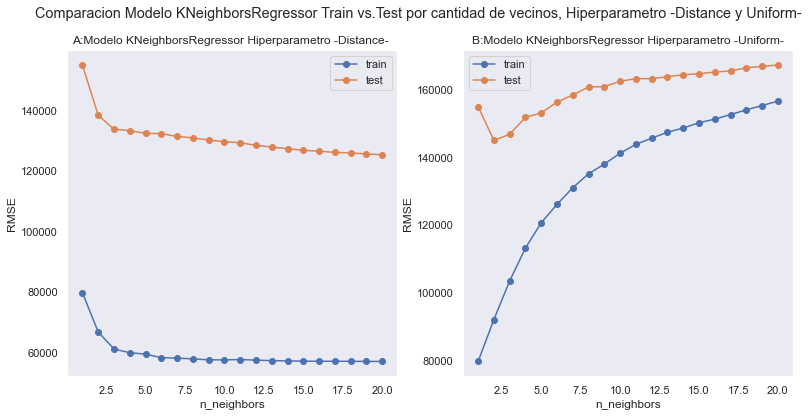

In [39]:
plt.figure(figsize=(13,6))
plt.suptitle("Comparacion Modelo KNeighborsRegressor Train vs.Test por cantidad de vecinos, Hiperparametro -Distance y Uniform-")

ax1=plt.subplot(1,2,1)
ax1=plt.plot(knn_DU_Nneighbors,knn_D_lista_train,"o-", label="train")
ax1=plt.plot(knn_DU_Nneighbors,knn_D_lista_test,"o-", label="test")
plt.title("A:Modelo KNeighborsRegressor Hiperparametro -Distance- ")
plt.xlabel("n_neighbors")
plt.ylabel("RMSE")
plt.grid()
plt.legend()

ax2=plt.subplot(1,2,2)
ax2=plt.plot(knn_DU_Nneighbors,knn_U_lista_train,"o-", label="train")
ax2=plt.plot(knn_DU_Nneighbors,knn_U_lista_test,"o-", label="test")
plt.title("B:Modelo KNeighborsRegressor Hiperparametro -Uniform-")
plt.xlabel("n_neighbors")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

**Consideramos que para el modelo con hiperparametro "Distance" la cantidad de n_neighbors de 15 es la adecuada ya  que en la grafica nos indica que luego del 15 el error es menor pero muy poco por lo que tampoco seleccionamos una cantidad mayor para no caer en el sobre ajuste del modelo.**

In [40]:
kkn_R2=KNeighborsRegressor(n_neighbors=15, weights="distance")
kkn_R2.fit(X_train,y_train)

kkn_R_predicion_ytest2=kkn_R2.predict(X_test)
kkn_R_predicion_ytrain2=kkn_R2.predict(X_train)

In [41]:
print("Modelo KnnR -distance-, n_neighbors= 15")
print(" ")
print("RMSE_y_test:",mean_squared_error(y_test,kkn_R_predicion_ytest2, squared=False))
print("RMSE_Train:",mean_squared_error(y_train,kkn_R_predicion_ytrain2, squared=False))
print(" ")
print("r2_score_y_test:",r2_score(y_test,kkn_R_predicion_ytest2))
print("r2_score_Train:",r2_score(y_train,kkn_R_predicion_ytrain2))

Modelo KnnR -distance-, n_neighbors= 15
 
RMSE_y_test: 126780.27055526315
RMSE_Train: 57184.082198878
 
r2_score_y_test: 0.8237484347725157
r2_score_Train: 0.9632225336739133


**Consideramos que para el modelo con hiperparametro "Uniform" la cantidad de n_neighbors de 5 es la optima; igual que dejarlo en default.**
**Se ve en la grafica el menor error es en n_neighbors=2 y luego el error se va haciendo mas grande, pero tambien consideramos que si lo dejamos en una cantidad tan baja,  si en el caso que las demas variables fueran distintas en cantidad y cercania el modelo no seria preciso y el error aumentaria por lo que la eleccion de 5 nos parece la adecuada.**

In [42]:
kkn_RU1=KNeighborsRegressor(n_neighbors=5, weights="uniform")
kkn_RU1.fit(X_train,y_train)

kkn_R_predicion_ytestU1=kkn_RU1.predict(X_test)
kkn_R_predicion_ytrainU1=kkn_RU1.predict(X_train)

In [43]:
print("Modelo KnnR -uniform-, n_neighbors= 5")
print(" ") 
print("RMSE_y_test:",mean_squared_error(y_test,kkn_R_predicion_ytestU1,squared=False))
print("RMSE_Train:",mean_squared_error(y_train,kkn_R_predicion_ytrainU1,squared=False))
print(" ") 
print("r2_score_y_test:",r2_score(y_test,kkn_R_predicion_ytestU1))
print("r2_score_Train:",r2_score(y_train,kkn_R_predicion_ytrainU1))

Modelo KnnR -uniform-, n_neighbors= 5
 
RMSE_y_test: 153095.93029739123
RMSE_Train: 120668.84104374747
 
r2_score_y_test: 0.7429859138786683
r2_score_Train: 0.8362347398257685


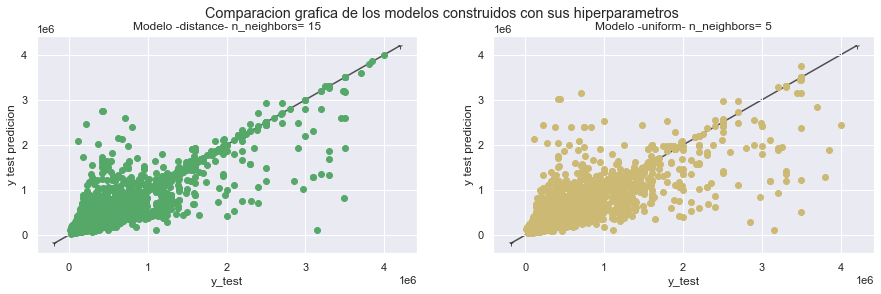

In [44]:
plt.figure(figsize=(15,4))
plt.suptitle("Comparacion grafica de los modelos construidos con sus hiperparametros")

ax1=plt.subplot(1,2,1)
ax1.scatter(y_test,kkn_R_predicion_ytest2,color="g")
lims= [np.min([ax1.get_xlim(),ax1.get_ylim()]),np.max([ax1.get_xlim(),ax1.get_ylim()]),]

ax1.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.title("Modelo -distance- n_neighbors= 15")
plt.xlabel("y_test")
plt.ylabel("y test predicion")

ax2=plt.subplot(1,2,2)
ax2.scatter(y_test,kkn_R_predicion_ytestU1,color="y")
lims= [np.min([ax2.get_xlim(),ax2.get_ylim()]),np.max([ax2.get_xlim(),ax2.get_ylim()]),]

ax2.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.title("Modelo -uniform- n_neighbors= 5")
plt.xlabel("y_test")
plt.ylabel("y test predicion")
plt.show()


**Entre estos dos modelos desarrollados el mejor es el "Modelo KnnR -distance-, n_neighbors=15" ya que las metricas seleccionadas para evaluarlos dan mejor tanto por un menor error en el RMSE como el R2_score.** 

**"Modelo KnnR -distance-, n_neighbors=15"**

 RMSE_test: 126780 
  / r2_score_test: 0.82

**"Modelo KnnR -uniform-, n_neighbors=5"**

 RMSE_test: 153095
  / r2_score_test: 0.74

# Modelo DecisionTreeRegressor.
**El parametro en el que vamos a hacer hincapie es el de Max Depth**


**Realizamos una iteracion con el hiperparametro max_depth para determinar que profundidad es la optima para el modelo y luego  poder compararlo con el KNeighborsRegressor y definir el mejor modelo.**

In [45]:
lista_train= []
lista_test= []

max_depths=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 

for max_depth in max_depths:
    
    tree_1=DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    tree_1.fit(X_train,y_train)
            
    ytrain_predic=tree_1.predict(X_train)
    TrainR2=mean_squared_error(y_train,ytrain_predic,squared=False)
    
    ytest_predic= tree_1.predict(X_test)
    TestR2=mean_squared_error(y_test,ytest_predic,squared=False)
        
    lista_train.append(TrainR2)
    lista_test.append(TestR2)

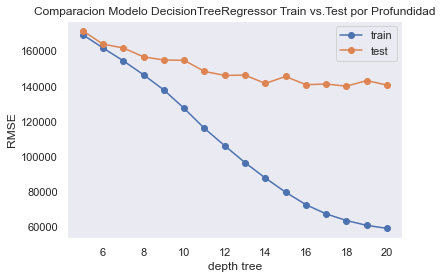

In [46]:
plt.plot(max_depths,lista_train,"o-", label="train")
plt.plot(max_depths,lista_test,"o-", label="test")
plt.title("Comparacion Modelo DecisionTreeRegressor Train vs.Test por Profundidad")
plt.xlabel("depth tree")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

**Observando el grafico podemos determinar que la profundidad optima del modelo es max_depth=16 ya que luego al aumentar la profundidad el error no disminuye en cambio se mantiene relativamente estable por lo que no seria adecuado sobre ajustar el modelo.**

In [47]:
Dec_Tree_R2=DecisionTreeRegressor(max_depth=16, random_state=42)
Dec_Tree_R2.fit(X_train,y_train)

Dec_Tree_R_predicion_ytest2=Dec_Tree_R2.predict(X_test)
Dec_Tree_R_predicion_ytrain2=Dec_Tree_R2.predict(X_train)

In [48]:
print("Modelo DecisionTreeRegressor, max_depth:16")
print("  ")
print("RMSE_y_test:",mean_squared_error(y_test,Dec_Tree_R_predicion_ytest2,squared=False))
print("RMSE_Train:",mean_squared_error(y_train,Dec_Tree_R_predicion_ytrain2,squared=False))
print("  ")
print("r2_score_y_test:",r2_score(y_test,Dec_Tree_R_predicion_ytest2))
print("r2_score_Train:",r2_score(y_train,Dec_Tree_R_predicion_ytrain2))

Modelo DecisionTreeRegressor, max_depth:16
  
RMSE_y_test: 140788.28484377195
RMSE_Train: 72579.20241683105
  
r2_score_y_test: 0.7826484856774989
r2_score_Train: 0.9407544304262043


**Vamos a graficar el modelo DecisionTreeRegressor recien hecho y el modelo KNeighborsRegressor el cual ya habiamos seleccionado.**
**A partir de las metricas y los graficos seleccionaremos el mejor modelo.**

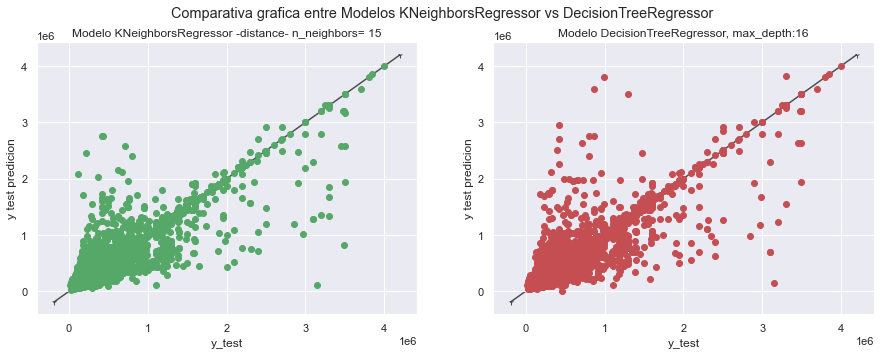

In [49]:
plt.figure(figsize=(15,5))
plt.suptitle("Comparativa grafica entre Modelos KNeighborsRegressor vs DecisionTreeRegressor")

ax1=plt.subplot(1,2,1)
ax1.scatter(y_test,kkn_R_predicion_ytest2,color="g")
lims= [np.min([ax1.get_xlim(),ax1.get_ylim()]),np.max([ax1.get_xlim(),ax1.get_ylim()]),]

ax1.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.title("Modelo KNeighborsRegressor -distance- n_neighbors= 15")
plt.xlabel("y_test")
plt.ylabel("y test predicion")

ax2=plt.subplot(1,2,2)
ax2.scatter(y_test,Dec_Tree_R_predicion_ytest2,color="r")
lims= [np.min([ax2.get_xlim(),ax2.get_ylim()]),np.max([ax2.get_xlim(),ax2.get_ylim()]),]

ax2.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.title("Modelo DecisionTreeRegressor, max_depth:16")
plt.xlabel("y_test")
plt.ylabel("y test predicion")
plt.show()

**El mejor modelo, entre los entrenados, para predecir la variable precio es el  Modelo KNeighborsRegressor -distance- n_neighbors=15. Como se ve en las metricas el error es menor y el R2 score es mayor.**

**"Modelo KnnR -distance-, n_neighbors=15"**

   RMSE_test: 126780 / r2_score_test: 0.82
   
 **"Modelo KnnR -uniform-, n_neighbors=5"**

   RMSE_test: 153095 / r2_score_test: 0.74

**"Modelo DecisionTreeRegressor, max_depth:16"**
   
   RMSE_test: 140788 / r2_score_test: 0.78

### Conclusion.
**El mejor modelo de todos los desarrollados es el Modelo KNeighborsRegressor en el que utilizamos el hiperparametro "Distance" y en cantidad de vecinos 15. Comprando la metrica de eleccion (RMSE) este modelo fue el que nos dio el menor resultado.**

**La comparacion realizada se puede ver en la linea de arriba.**

### Siendo critico con la metodologia utilizada.
**Creo que el tratamiento dado al DataSet no fue el mas correcto pero en este punto nosotros estamos filtrando instancias directamente en vez de analizar otra opcion, como  completar los faltantes o correguir los errores, osea falta mucho procesamiento de datos.Este en un punto a mejorar mucho.**

**Por otro lado considero que la variable predictora mas relevante es la ubicacion de las propiedades, que no fue tenida en cuenta por el dataset en este momento.**

**Por ultimo creo que los modelos trabajados no son lo sufucientemente robustos para predecir el precio pero estoy seguro que en el transcurso del curso veremos otros, los cuales cubran esta problematica de una mejor manera.**